# 5. DATA VISUALIZATION


In this chapter, you will learn to **represent the data** in different visual contexts and patterns. The tools required are **Jupyter Notebook** and **Python**.

Visualization is important for understanding the data by placing it in a visual context, so that **patterns, trends, and correlations** can be detected.



## 5.1. Creating and importing the data set

You can create your data set manually, or you can obtain it from the Internet, from services such as [kaggle](https://www.kaggle.com/datasets). More about data set management can be found in Chapter 3.

Make sure that your data is organized in the **csv** (comma separated values) format, and saved as a file on your computer.

For the following examples, we are going to use the [Students Performance in Exams](https://www.kaggle.com/datasets/whenamancodes/students-performance-in-exams) data set, however, you are free to use any data set you like. The file on the computer is named *exams.csv*.

The following code will import the *pandas* library for data manipulation and analysis, as well as the *numpy* library for high level mathematical functions:

In [2]:
import pandas as pd
import numpy as np

Now, the data set can be imported and previewed:  

In [3]:
Students = pd.read_csv('https://raw.githubusercontent.com/VALENCEML/eBOOK/main/EN/05/exams.csv')
Students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


Also, the data types and the structure of the data in the dataset can be checked:

In [4]:
Students.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In the following, two different libraries for data visualization are demonstrated, **seaborn** and **pyplot** , each offering specific advantages over the other. In general, *pyplot* is used for making basic graphs consisting of lines, plots, pie charts, bar-graphs etc., while *seaborn* uses patterned representation. The *pyplot* syntax is somewhat more complex, but also more robust and customizable, than *seaborn* syntax.

## 5.2. Seaborn library

The seaborn library is great for making statistical analysis, and for wholesome exploration and understanding of the data. Here is one possib le way of importing the library and setting the color palletes:

In [5]:
import seaborn as sbn
sbn.set(color_codes=True)

Now, we can analyze univariate, bivariate, or multivariate statistics of the data set. Starting with something simple, as gender distribution of the students, would be:

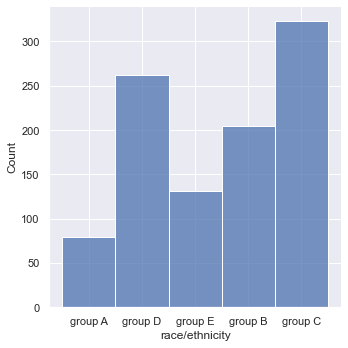

In [6]:
sbn.displot(Students['race/ethnicity'])

*Exercise*: try other parameters instead of gender!

An example of bivariate statistics, the visual correlation between the reading and writing scores, can be easily obtained using:

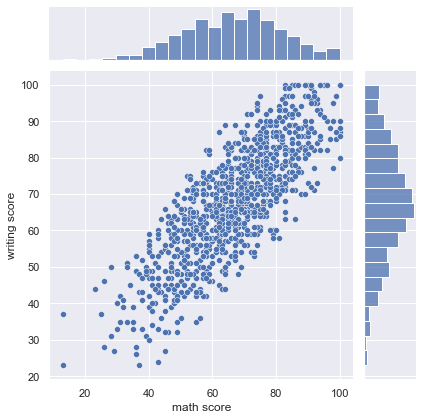

In [7]:
sbn.jointplot(data=Students, x="math score", y="writing score")

*Exercise*: try replacing one of the parameters with math score! Can you spot the weakening of the correlation? Can you explain it?

The coloring of the data points can also be made dependent on some of the data parameters, making important realizations. For example, the impact of taking a test preparation course on the outcome of the exams, can be visualized with:

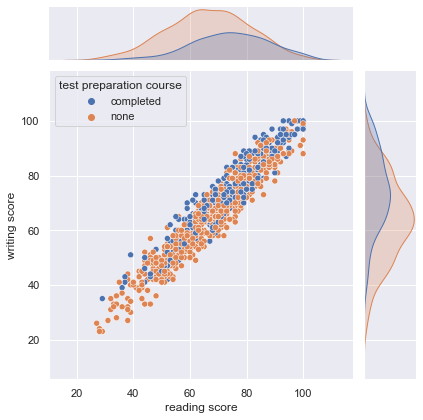

In [9]:
sbn.jointplot(data=Students, x="reading score", y="writing score", hue = 'test preparation course')

*Exercise*: observe the impact of some other parameters, gender, race, parental level of education... can you spot any statistical importance?

If we are not sure which parameters in the data set are correlated, the *pairplot* function is a great way of generating automatic pairwise relationship plots between the relevant parameters in the data set:

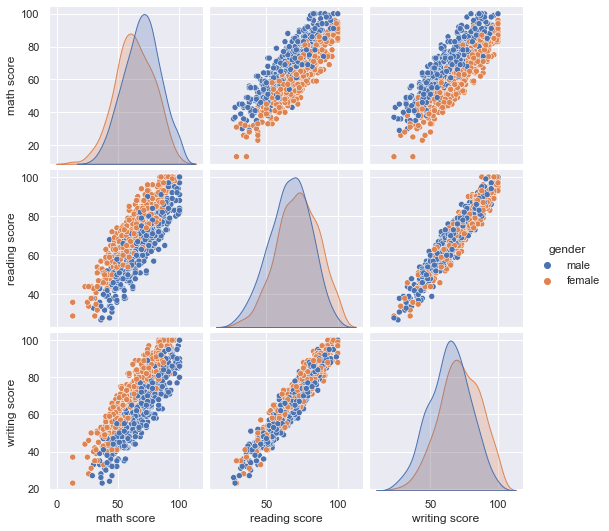

In [10]:
sbn.pairplot(Students, hue='gender')

This creates a grid of plots which examine bivariate relationships between each pair of parameters. The plots in the main diagonal are a univariate distribution plots.

It is also possible to reorganize the grid, to show a subset of parameters, or to plot different variables on the rows and columns:

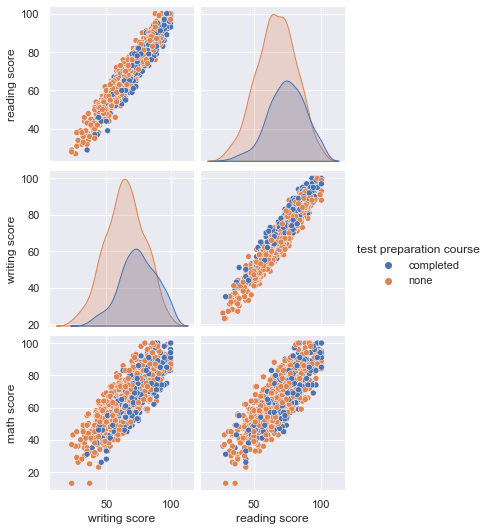

In [11]:
sbn.pairplot(Students,x_vars=['writing score','reading score'],y_vars=['reading score','writing score','math score'],hue='test preparation course')

*Further practice*: experiment with other visualization functions from the [seaborn library](https://seaborn.pydata.org/index.html), e.g. stripplot, boxplot, barplot, countplot ...

## 5.3. Pyplot library

Pyplot is a module of the **matplotlib** package, a powerful plotting library for the Python and the NumPy. It provides an object oriented API for drawing plots and embedding them into applications. While it can obtain similar visualizations as seaborn, the syntax to obtain them is somewhat more complex. Seaborn has implemented some higher level functions for statistical analysis, while pyplot has more step by step approach and broader control over the plot parameters.
Here is one possible way of importing pyplot:

In [12]:
from matplotlib import pyplot as plt

Now, we can analyze univariate, bivariate, or multivariate statistics of the data set. Pandas, numpy, and the *Students* dataset should also be imported (see the beginning of this lecture).
Starting with something simple, as gender distribution of the students, we can do the following:

<BarContainer object of 2 artists>

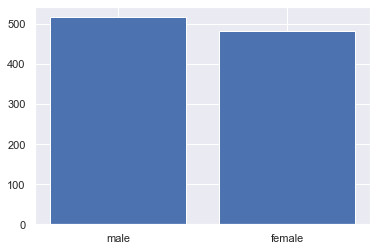

In [13]:
counts = Students.gender.value_counts()
plt.bar(["male","female"],counts)

Note how the chart is somewhat similar to the one obtained by seaborn, however, the process of generating it is entirely different. Seaborn performs the counting and the column naming steps automatically, while here, we explicitly state what we want on the chart. The latter is a bit more time consuming, but gives us more control and opportunities for customization.
Let's try to put the same data in a different type of chart:

([<matplotlib.patches.Wedge at 0x2698fa1e9a0>,
 [Text(-0.05871992619937442, 1.0984315956249346, 'male'),
  Text(0.058720029041962135, -1.0984315901271737, 'female')])

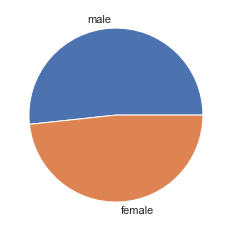

In [14]:
plt.pie(counts, labels =["male","female"] )


*Further practice*: experiment with the broad palette of visualization parameters, like *explode*, *colors*, *shadow*, *startangle*, etc. You can read about the proper syntax here [matplotlib.pyplot.pie](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html)

Now let's try to replicate a bivariate statistics chart, the visual correlation between the reading and writing scores:

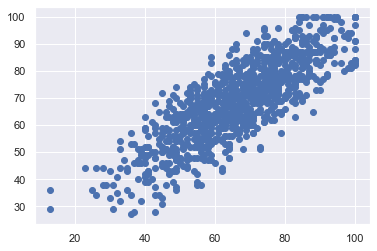

In [15]:
plt.scatter(Students['math score'],Students['reading score'])


This chart is the basic form of the data. We can add a little makeup to it, and make it more informative:

Text(0, 0.5, 'reading')

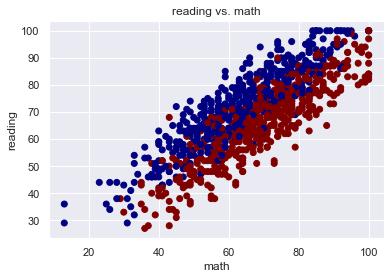

In [16]:
plt.scatter(Students['math score'],Students['reading score'],c=Students['gender']=="male",cmap='jet')
plt.title("reading vs. math")
plt.xlabel("math")
plt.ylabel("reading")

*Exercise*: try putting different data in the chart (writing, reading, math). Play with colors. You can read about the proper syntax here [matplotlib.pyplot.scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)

One important aspect of data visulalization are the **line charts**. They are widely used to represent continuous data and to understand its patterns and trends. Pyplot is especially powerful tool for drawing and customizing line charts. To ilustrate this, we will import another data set: [World Population 1960-2018](https://www.kaggle.com/datasets/imdevskp/world-population-19602018?select=population_total_long.csv).
(make sure the *csv* file is downloaded on your computer).

In [17]:
Population = pd.read_csv('https://raw.githubusercontent.com/VALENCEML/eBOOK/main/EN/05/population_total_long.csv')
Population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12595 entries, 0 to 12594
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CountryName  12595 non-null  object
 1   Year         12595 non-null  int64 
 2   Count        12595 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 295.3+ KB


Let's try to plot the population count for Macedonia over the years. For that, first, we have to isolate the data for Macedonia, from the data for other countries:

In [18]:
Macedonia = Population[Population.CountryName == 'Macedonia']

Now we can plot the population over the years. The horizontal axis should be the years, and the vertical axis the population count.

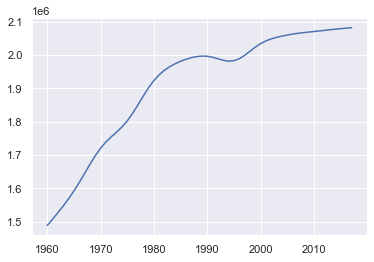

In [20]:
plt.plot(Macedonia.Year, Macedonia.Count)

Note the 1e6 number above the left upper corner of the chart. That number shows that the numbers denoted on the vertical axis should be multiplied by that factor. If we want to show the numbers already converted in millions, then the following could be executed:

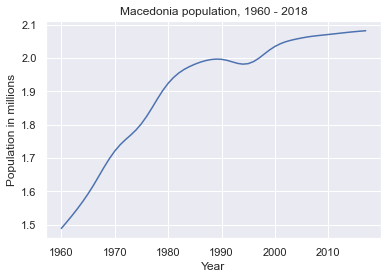

In [21]:
plt.plot(Macedonia.Year, Macedonia.Count / 10**6)
plt.title("Macedonia population, 1960 - 2018")
plt.xlabel("Year")
plt.ylabel("Population in millions")
plt.show()

*Exercise*: try to plot the data for your country, or for some other country of the world. The names of the countries included in the data can be seen if you open the data for previewing, or you can directly open the saved csv file.

Now, let's try to compare the population counts in Macedonia and Slovenia over the years (don't forget to isolate the data first):

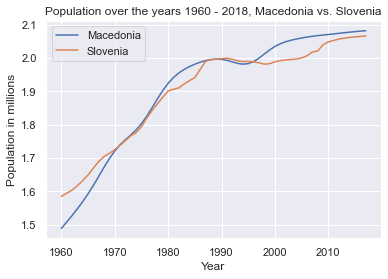

In [22]:
Slovenia = Population[Population.CountryName == 'Slovenia']
plt.plot(Macedonia.Year, Macedonia.Count / 10**6)
plt.plot(Slovenia.Year, Slovenia.Count / 10**6)
plt.title("Population over the years 1960 - 2018, Macedonia vs. Slovenia")
plt.xlabel("Year")
plt.ylabel("Population in millions")
plt.legend(["Macedonia","Slovenia"])
plt.show()

Let's also add Serbia to the chart:

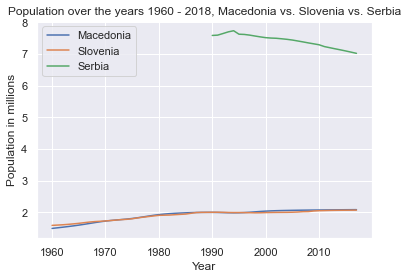

In [23]:
Serbia = Population[Population.CountryName == 'Serbia']
plt.plot(Macedonia.Year, Macedonia.Count / 10**6)
plt.plot(Slovenia.Year, Slovenia.Count / 10**6)
plt.plot(Serbia.Year, Serbia.Count / 10**6)
plt.title("Population over the years 1960 - 2018, Macedonia vs. Slovenia vs. Serbia")
plt.xlabel("Year")
plt.ylabel("Population in millions")
plt.legend(["Macedonia","Slovenia", "Serbia"])
plt.show()

We can see that the data for Serbia is incomplete and starts only in 1990. To show only the range where data is available for all three countries, we can limit the horizontal axis:

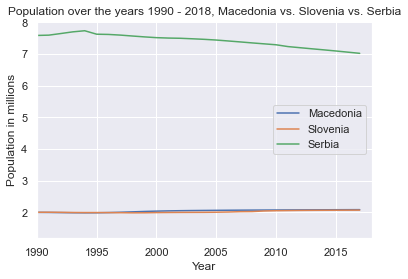

In [24]:
Serbia = Population[Population.CountryName == 'Serbia']
plt.plot(Macedonia.Year, Macedonia.Count / 10**6)
plt.plot(Slovenia.Year, Slovenia.Count / 10**6)
plt.plot(Serbia.Year, Serbia.Count / 10**6)
plt.xlim([1990,2018])
plt.title("Population over the years 1990 - 2018, Macedonia vs. Slovenia vs. Serbia")
plt.xlabel("Year")
plt.ylabel("Population in millions")
plt.legend(["Macedonia","Slovenia", "Serbia"])
plt.show()

Note how the legend was automatically moved to another location, in order to not interfere with the lines.

The absolute count of the populations shown on same chart renders the lines for Macedonia and Slovenia very near one to another, because they are both small in comparison to the population in Serbia. However, maybe more informative chart would be the relative growth of the population, over the years. To make the data relative, we should set a reference population. Let's say that the year 1990 population will be our reference, and we will assign 100% value to that count. Then, every other year will be calculated relative to the reference.

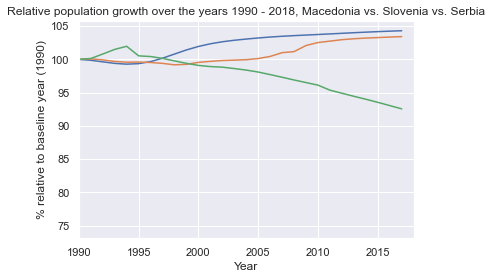

In [25]:
MacReference = float(Macedonia.Count[Macedonia.Year == 1990])     # casting to float, in order to use for calculations
SloReference = float(Slovenia.Count[Slovenia.Year == 1990])
SerReference = float(Serbia.Count[Serbia.Year == 1990])

MacRelative = pd.to_numeric(Macedonia.Count,errors='coerce') / MacReference  # Note how a series of data is cast into float
SloRelative = pd.to_numeric(Slovenia.Count,errors='coerce') / SloReference 
SerRelative = pd.to_numeric(Serbia.Count,errors='coerce') / SerReference 

plt.plot(Macedonia.Year, MacRelative * 100)    # multiply by 100 to make it percentage
plt.plot(Slovenia.Year, SloRelative * 100)
plt.plot(Serbia.Year, SerRelative * 100)
plt.xlim([1990,2018])
plt.title("Relative population growth over the years 1990 - 2018, Macedonia vs. Slovenia vs. Serbia")
plt.xlabel("Year")
plt.ylabel("% relative to baseline year (1990)")
plt.show()

*Exercises and further reading*: 
- Try changing the colors of the lines to match the colors of the national sports teams from the three countries (Macedonia: red, Slovenia: green, Serbia: blue). 
- Try limiting the vertical axis to the relevant part of the chart.
- Experiment with the line styles (solid, dashed, dotted...) and line markers (circle, triangle, star...)

The documentation about the proper syntax can be found here [matplotlib.pyplot.plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)
